In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import pprint
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import pyplot as plt


base = r"D:/ENTC/SEM_4/EN2550 - Fundamentals of Image Processing and Machine Vision/~images/";

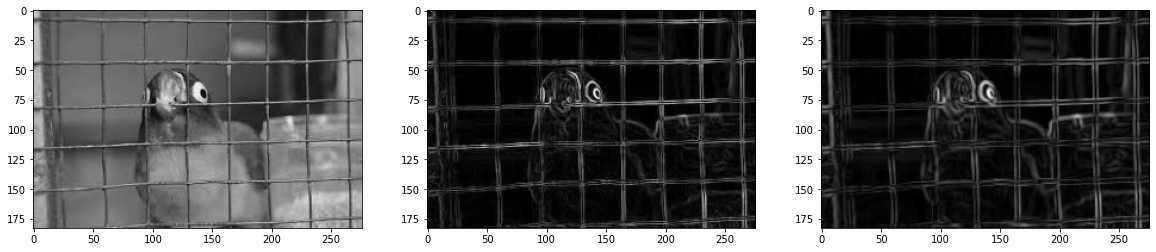

In [5]:
img = cv.imread(base + "bird-cage.jpg",0).astype(np.float32)
assert img is not None

fig,ax = plt.subplots(1,3,figsize=(20,20))
ax[0].imshow(img,cmap="gray")

sv3 = np.array([[-1,-2,-1],[0,0,0],[1,2,1]],np.float32)
sh3 = sv3.T
img_x3 = cv.filter2D(img,-1,sh3)
img_y3 = cv.filter2D(img,-1,sv3)
img_grad3 = np.sqrt(img_x3**2+img_y3**2)
img_grad3_norm = np.array(img_grad3*255/np.max(img_grad3),dtype=np.uint8)


sv5 = np.array([[-2,-2,-4,-2,-2],
               [-1,-1,-2,-1,-1],
               [0,0,0,0,0],
               [1,1,2,1,1],
               [2,2,4,2,2]],np.float32)
sh5 = sv5.T
img_x5 = cv.filter2D(img,-1,sh5)
img_y5 = cv.filter2D(img,-1,sv5)
img_grad5 = np.sqrt(img_x5**2+img_y5**2)

ax[1].imshow(img_grad3,cmap="gray")
ax[2].imshow(img_grad5,cmap="gray")



[[[148.           0.7853982 ]]

 [[153.           0.7853982 ]]

 [[141.           0.7853982 ]]

 ...

 [[  1.           0.7330383 ]]

 [[322.           0.7853982 ]]

 [[321.           0.80285144]]]


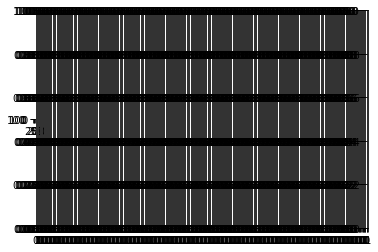

In [6]:
fig,ax = plt.subplots(1,255)
ax[0].imshow(img)
lines = cv.HoughLines(img_grad3_norm,1,np.pi/180,2)
print(lines)
for line in lines:
    rho,theta =line[0]
    a=np.cos(theta)
    b=np.sin(theta)
    x0,y0=a*rho,b*rho
    x1,y1=int(x0+1000*(-b)),int(y0+1000*a)
    x2,y2=int(x0-1000*(-b)),int(y0-1000*a)
    cv.line(img,(x1,y1),(x2,y2),(0,0,255),2)

ax[1].imshow(img)


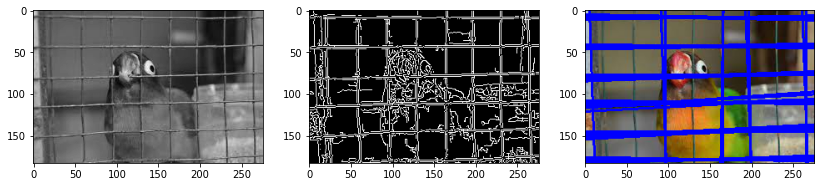

In [12]:

im = cv.imread(base + "bird-cage.jpg",cv.IMREAD_COLOR)
assert im is not None
im = cv.cvtColor(im,cv.COLOR_BGR2RGB)
gray = cv.cvtColor(im,cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray,20,120,apertureSize=3)
lines=cv.HoughLines(edges,1,np.pi/180,105)

for line in lines:
  rho,theta=line[0]
  a=np.cos(theta)
  b=np.sin(theta)
  x0,y0=a*rho,b*rho
  x1,y1=int(x0+1000*(-b)),int(y0+1000*a)
  x2,y2=int(x0-1000*(-b)),int(y0-1000*a)
  cv.line(im,(x1,y1),(x2,y2),(0,0,255),2)

fig,ax= plt.subplots(1,3,figsize=(14,6))
ax[0].imshow(gray,cmap='gray',vmin=0,vmax=255)
ax[1].imshow(edges,cmap='gray',vmin=0,vmax=255)
ax[2].imshow(im)